In [3]:
import pandas as pd
import time
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 特征工程,读取数据

In [4]:
df= pd.read_csv("/Users/bobbyding/Documents/GitHub/CryptoDataForge/funding_data/binance_funding_rate_8h.csv")

# df['fundingRate_sin'] = np.sin(2 * np.pi * df['fundingRate'] / 24)
# df['fundingRate_cos'] = np.cos(2 * np.pi * df['fundingRate'] / 24)

df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784913 entries, 0 to 784912
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   symbol          784913 non-null  object 
 1   fundingTime_8h  784913 non-null  object 
 2   fundingRate     784913 non-null  float64
 3   markPrice       385874 non-null  float64
dtypes: float64(2), object(2)
memory usage: 24.0+ MB


,fundingRate,markPrice
count,784913.000000,385874.000000
mean,0.000087,537.743340
std,0.000709,5747.294945
min,-0.062475,0.000000
25%,0.000084,0.128390
50%,0.000100,0.597220
75%,0.000100,3.548607
max,0.010145,107128.900000


symbol
1000000MOGUSDT    0.000285
1000BONKUSDC      0.000070
1000BONKUSDT      0.000190
1000CATUSDT       0.000251
1000CHEEMSUSDT    0.000356
                    ...   
ZETAUSDT          0.000108
ZILUSDT           0.000149
ZKUSDT            0.000097
ZROUSDT           0.000056
ZRXUSDT           0.000153
Name: fundingRate, Length: 386, dtype: float64
symbol
1000000MOGUSDT    0.311633
1000BONKUSDC      0.077133
1000BONKUSDT      0.208304
1000CATUSDT       0.275083
1000CHEEMSUSDT    0.390344
                    ...   
ZETAUSDT          0.118034
ZILUSDT           0.163357
ZKUSDT            0.105861
ZROUSDT           0.060906
ZRXUSDT           0.167381
Name: fundingRate, Length: 386, dtype: float64


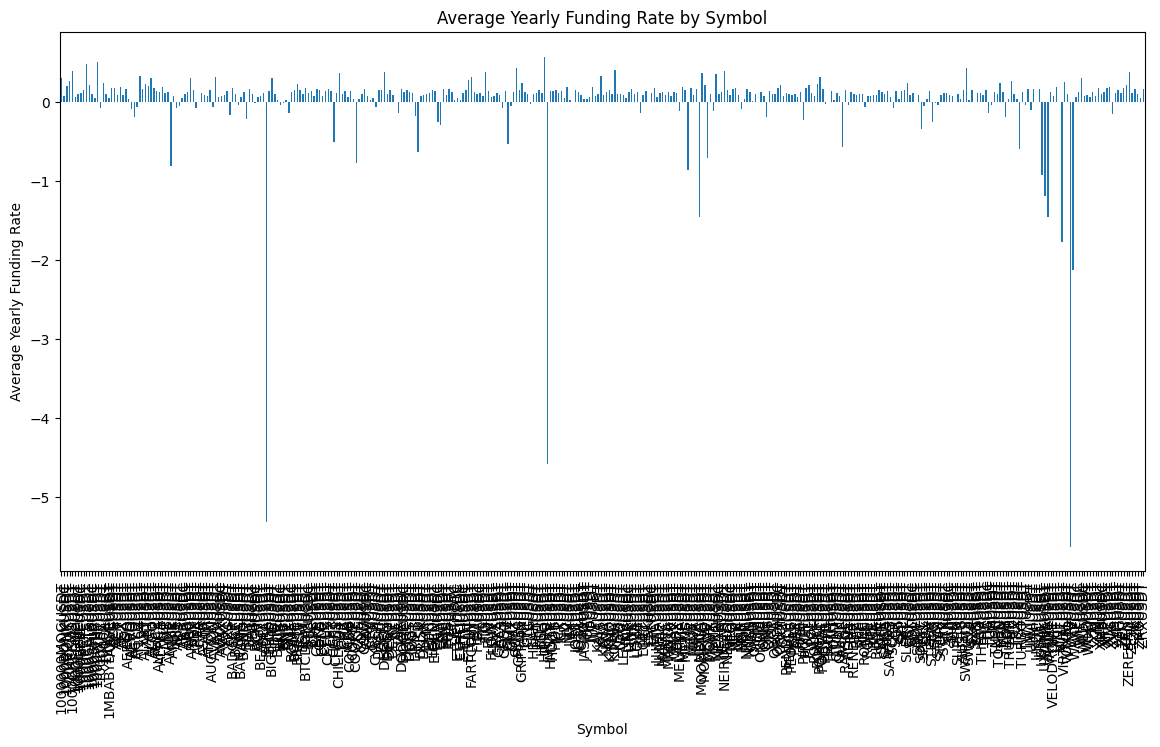

[-0.08028318  0.02731028  0.07590435  0.09566997  0.10943381  0.12572018
  0.14207057  0.16345692  0.21401411  0.57741423]


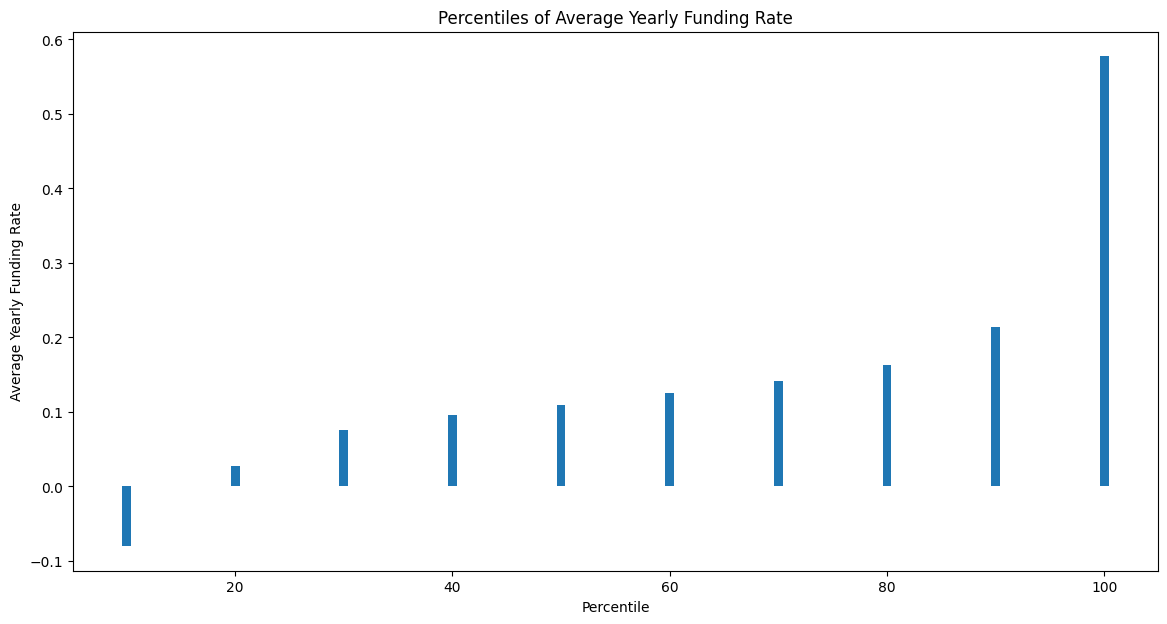

10th Percentile: ['AEROUSDT', 'AEVOUSDT', 'ANIMEUSDT', 'AXSUSDT', 'BANUSDT', 'BERAUSDT', 'BNXUSDT', 'CGPTUSDT', 'COOKIEUSDT', 'DIAUSDT', 'DRIFTUSDT', 'DUSDT', 'ENAUSDC', 'ENAUSDT', 'GLMUSDT', 'HIVEUSDT', 'LPTUSDT', 'MELANIAUSDT', 'MEUSDT', 'MOCAUSDT', 'MOVEUSDT', 'MTLUSDT', 'NMRUSDT', 'ONGUSDT', 'PIPPINUSDT', 'RAREUSDT', 'SONICUSDT', 'STEEMUSDT', 'TIAUSDC', 'TRBUSDT', 'TSTUSDT', 'UMAUSDT', 'USUALUSDT', 'UXLINKUSDT', 'VANAUSDT', 'VINEUSDT', 'VTHOUSDT', 'VVVUSDT', 'XVGUSDT']
20th Percentile: ['1000XECUSDT', 'AGLDUSDT', 'APEUSDT', 'API3USDT', 'ARKUSDT', 'ARPAUSDT', 'AUCTIONUSDT', 'BALUSDT', 'BCHUSDC', 'BNBUSDC', 'BNBUSDT', 'BNTUSDT', 'CRVUSDT', 'CYBERUSDT', 'DFUSDT', 'GASUSDT', 'GMTUSDT', 'GUSDT', 'IMXUSDT', 'INJUSDT', 'LSKUSDT', 'OGNUSDT', 'OMUSDT', 'POWRUSDT', 'PROMUSDT', 'RDNTUSDT', 'RONINUSDT', 'SCRTUSDT', 'SOLUSDT', 'SPELLUSDT', 'STGUSDT', 'STMXUSDT', 'SUNUSDT', 'SWELLUSDT', 'SYNUSDT', 'TIAUSDT', 'TUSDT', 'USDCUSDT', 'VIDTUSDT']
30th Percentile: ['1000FLOKIUSDT', '1000SHIBUSDT', '1MB

In [6]:
average_funding_rate = df.groupby('symbol')['fundingRate'].mean()
average_year_funding_rate = average_funding_rate * 3 * 365
print(average_funding_rate)
print(average_year_funding_rate)

plt.figure(figsize=(14, 7))
average_year_funding_rate.plot(kind='bar')
plt.title('Average Yearly Funding Rate by Symbol')
plt.xlabel('Symbol')
plt.ylabel('Average Yearly Funding Rate')
plt.show()

average_year_funding_rate.describe()

percentiles = np.percentile(average_year_funding_rate, np.arange(10, 101, 10))
print(percentiles)

plt.figure(figsize=(14, 7))
plt.bar(range(10, 101, 10), percentiles)
plt.title('Percentiles of Average Yearly Funding Rate')
plt.xlabel('Percentile')
plt.ylabel('Average Yearly Funding Rate')
plt.show()

percentile_symbols = {}

for i, percentile in enumerate(percentiles):
    if i == 0:
        symbols_in_percentile = average_year_funding_rate[average_year_funding_rate <= percentile].index.tolist()
    else:
        symbols_in_percentile = average_year_funding_rate[(average_year_funding_rate > percentiles[i-1]) & (average_year_funding_rate <= percentile)].index.tolist()
    percentile_symbols[f'{i*10+10}th Percentile'] = symbols_in_percentile

for percentile, symbols in percentile_symbols.items():
    print(f"{percentile}: {symbols}")